<a href="https://colab.research.google.com/github/Cesar-Curitol/IA_aplicada_a_la_ciencia_de_datos/blob/main/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [1]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Despu√©s de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
clientes = pd.read_csv(url_clientes)
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [4]:
ventas = pd.read_csv(url_ventas)
ventas.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  
0           4457.9         4  713.26              Paypal  
1            115.9         1    0.00       Transferencia  
2             68.9         2   13.78  Tarjeta de Cr√©dito  
3             80.9         5   40.45       Transferencia  
4            165.0         4    0.00       Transferencia

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

# Ver primeras filas del DataFrame
clientes.head()

## Ver la estructura general del DataFrame
clientes.info()

## Estad√≠sticas descriptivas de columnas num√©ricas
clientes.describe()

## Ver columnas √∫nicas categ√≥ricas y su distribuci√≥n
clientes['sexo'].value_counts()
clientes['regi√≥n'].value_counts()
clientes['estado'].value_counts()
clientes['ciudad'].nunique()  # Cantidad de ciudades distintas

## Edad: verificar rango y distribuci√≥n
clientes['edad'].describe()
clientes['edad'].hist(bins=20)

## Participaci√≥n en el programa de cashback
clientes['cashback'].value_counts(normalize=True)

## Calificaci√≥n (nota) de las compras
clientes['nota'].value_counts().sort_index()
clientes['nota'].describe()

## Ver si hay valores duplicados por ID de compra
clientes['ID_compra'].duplicated().sum()

## Ver si un cliente puede tener m√°s de una compra
clientes['ID_cliente'].value_counts().head()

## Tama√±o del DataFrame
clientes.shape


In [5]:
# Ver primeras filas del DataFrame
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [6]:
# Ver la estructura general del DataFrame
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [7]:
# Estad√≠sticas descriptivas de columnas num√©ricas
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [8]:
# Ver columnas √∫nicas categ√≥ricas y su distribuci√≥n
clientes['sexo_biologico'].value_counts()
clientes['region'].value_counts()
clientes['estado'].value_counts()
clientes['ciudad'].nunique()  # Cantidad de ciudades distintas


94

<Axes: >

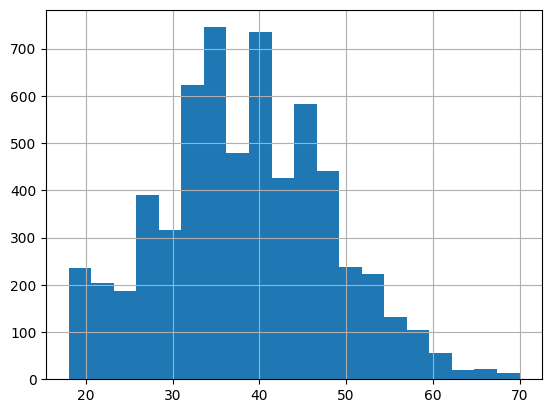

In [9]:
# Edad: verificar rango y distribuci√≥n
clientes['edad'].describe()
clientes['edad'].hist(bins=20)

In [10]:
# Participaci√≥n en el programa de cashback
clientes['cashback'].value_counts(normalize=True)

cashback
No    0.576593
S√≠    0.423407
Name: proportion, dtype: float64

In [11]:
# Calificaci√≥n (nota) de las compras
clientes['nota'].value_counts().sort_index()
clientes['nota'].describe()

count    6169.000000
mean        8.443670
std         1.730584
min         0.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        10.000000
Name: nota, dtype: float64

In [12]:
# Ver si hay valores duplicados por ID de compra
clientes['ID_compra'].duplicated().sum()

np.int64(0)

In [13]:
# Ver si un cliente puede tener m√°s de una compra
clientes['ID_cliente'].value_counts().head()


ID_cliente
5267    7
5145    6
4421    6
9864    6
9363    5
Name: count, dtype: int64

In [14]:
# Tama√±o del DataFrame
clientes.shape


(6169, 9)

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

## Ver primeras filas del DataFrame
ventas.head()

## Estructura general del DataFrame
ventas.info()

## Dimensi√≥n del DataFrame
ventas.shape

## Ver si el ID de compra es √∫nico
ventas['ID_compra'].duplicated().sum()

## Estad√≠sticas descriptivas de columnas num√©ricas
ventas[['precio_unitario', 'cantidad', 'envio']].describe()

## Categor√≠as de productos y su distribuci√≥n
ventas['categoria'].value_counts()

## M√©todos de pago utilizados
ventas['metodo_pago'].value_counts(normalize=True)

## Ver rango de fechas
ventas['fecha'] = pd.to_datetime(ventas['fecha'])  # asegurarse de que sea tipo datetime
ventas['fecha'].min(), ventas['fecha'].max()

## Crear columna de monto total por l√≠nea de venta
ventas['monto_total'] = ventas['precio_unitario'] * ventas['cantidad'] + ventas['envio']

## Distribuci√≥n de montos totales
ventas['monto_total'].describe()

## An√°lisis de la columna 'horario': extraer hora como entero
ventas['hora'] = ventas['horario'].astype(str).str[:2].astype(int)
ventas['hora'].value_counts().sort_index()

## Horarios m√°s frecuentes (top 10)
ventas['horario'].value_counts().head(10)

## Ingreso total por categor√≠a de producto
ventas.groupby('categoria')['monto_total'].sum().sort_values(ascending=False)

## Ingreso total por m√©todo de pago
ventas.groupby('metodo_pago')['monto_total'].sum().sort_values(ascending=False)


In [15]:
# Ver primeras filas del DataFrame
ventas.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  
0           4457.9         4  713.26              Paypal  
1            115.9         1    0.00       Transferencia  
2             68.9         2   13.78  Tarjeta de Cr√©dito  
3             80.9         5   40.45       Transferencia  
4            165.0         4    0.00       Transferencia

In [16]:
# Estructura general del DataFrame
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [17]:

# Dimensi√≥n del DataFrame
ventas.shape


(6169, 8)

In [18]:
# Ver si el ID de compra es √∫nico
ventas['ID_compra'].duplicated().sum()

np.int64(0)

In [19]:
# Estad√≠sticas descriptivas de columnas num√©ricas
ventas[['precio_unitario', 'cantidad', 'envio']].describe()

precio_unitario     cantidad        envio
count      6169.000000  6169.000000  6169.000000
mean        873.234738     3.004863   119.233832
std        1852.064342     1.420725   366.149225
min           2.900000     1.000000     0.000000
25%          44.900000     2.000000     0.320000
50%          93.900000     3.000000     7.550000
75%         221.900000     4.000000    29.240000
max        8000.000000     5.000000  4521.540000

In [20]:
# Categor√≠as de productos y su distribuci√≥n
ventas['categoria'].value_counts()

categoria
Alimentos y bebidas            1495
Belleza e higiene              1062
Casa y aseo                    1041
Electrodom√©sticos               665
Electr√≥nicos                    580
Papeler√≠a y oficina             551
Herramientas y construcci√≥n     474
Libros                          301
Name: count, dtype: int64

In [21]:
# M√©todos de pago utilizados
ventas['metodo_pago'].value_counts(normalize=True)


metodo_pago
Tarjeta de Cr√©dito    0.462149
Transferencia         0.363754
Tarjeta de D√©bito     0.088669
Paypal                0.085427
Name: proportion, dtype: float64

In [22]:
# Ver rango de fechas
ventas['fecha'] = pd.to_datetime(ventas['fecha'])  # asegurarse de que sea tipo datetime
ventas['fecha'].min(), ventas['fecha'].max()

(Timestamp('2023-01-03 00:00:00'), Timestamp('2023-12-31 00:00:00'))

In [23]:
# Crear columna de monto total por l√≠nea de venta
ventas['monto_total'] = ventas['precio_unitario'] * ventas['cantidad'] + ventas['envio']

In [24]:
# Distribuci√≥n de montos totales
ventas['monto_total'].describe()

count     6169.000000
mean      2752.311154
std       6590.867737
min          2.900000
25%        109.760000
50%        272.320000
75%        780.890000
max      43025.950000
Name: monto_total, dtype: float64

In [25]:
# An√°lisis de la columna 'horario': extraer hora como entero
ventas['hora'] = ventas['horario'].astype(str).str[:2].astype(int)
ventas['hora'].value_counts().sort_index()

hora
0     669
14    327
15    326
16    308
17    653
18    984
19    316
20    289
21    656
22    657
23    984
Name: count, dtype: int64

In [26]:
# Horarios m√°s frecuentes (top 10)
ventas['horario'].value_counts().head(10)

horario
23:56    26
18:45    26
23:54    25
18:39    24
18:53    24
23:50    23
18:03    23
23:25    23
18:56    22
17:59    22
Name: count, dtype: int64

In [27]:
# Ingreso total por categor√≠a de producto
ventas.groupby('categoria')['monto_total'].sum().sort_values(ascending=False)

categoria
Electr√≥nicos                   11025894.73
Electrodom√©sticos               4548591.79
Belleza e higiene                441649.72
Casa y aseo                      331036.13
Herramientas y construcci√≥n      264552.08
Alimentos y bebidas              241663.20
Libros                            78380.24
Papeler√≠a y oficina               47239.62
Name: monto_total, dtype: float64

In [28]:
# Ingreso total por m√©todo de pago
ventas.groupby('metodo_pago')['monto_total'].sum().sort_values(ascending=False)

metodo_pago
Tarjeta de Cr√©dito    7769428.91
Transferencia         6260073.08
Paypal                1667076.30
Tarjeta de D√©bito     1282429.22
Name: monto_total, dtype: float64

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [29]:
# Unir los DataFrames usando ID_compra como llave
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# Reordenar las columnas seg√∫n lo solicitado
columnas_ordenadas = ['ID_compra','fecha','horario','categoria',
    'precio_unitario','cantidad','envio','metodo_pago','ID_cliente',
    'edad','sexo_biologico','ciudad','estado','region','cashback','nota'
]

df = df[columnas_ordenadas]
df.head()

ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota  
0        Hermosillo            Sonora      Noroeste       S√≠    10  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7  
3          Veracruz          Veracruz         Golfo       S√≠     9  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

---
---

## Sugerencias de visualizaciones de Chat-GPT


##üßæ 1. An√°lisis de Facturaci√≥n
Objetivo: Entender el comportamiento de las ventas a lo largo del tiempo.

**Facturaci√≥n mensual**

Gr√°fico de l√≠neas: fecha (resample a meses) vs. facturaci√≥n total (precio_unitario * cantidad + envio)

**Top categor√≠as por facturaci√≥n**

Gr√°fico de barras: categoria vs. monto_total

**Ingresos por m√©todo de pago**

Gr√°fico de torta o barras horizontales: metodo_pago vs. total vendido

**Comparativa con y sin cashback**

Gr√°fico de barras agrupadas: cashback vs. monto_total

##üë• 2. Perfil del Cliente
Objetivo: Entender qui√©n es el cliente de Zoop y c√≥mo consume.

**Distribuci√≥n etaria**

Histograma: edad

**Distribuci√≥n por sexo biol√≥gico**

Gr√°fico de torta: sexo_biologico

**Facturaci√≥n por franja etaria y sexo**

Gr√°fico de barras agrupadas: buckets de edad vs. monto_total por sexo_biologico

**Clientes por regi√≥n/estado**

Mapa o heatmap: region o estado con cantidad de clientes

**Ticket promedio por regi√≥n o estado**

Gr√°fico de barras: estado vs. monto_total / ID_compra

##‚è±Ô∏èÔ∏è 3. An√°lisis Temporal del Consumo
Objetivo: Evaluar cu√°ndo se compra m√°s.

**Ventas por hora del d√≠a**

Gr√°fico de l√≠neas o barras: hora vs. total de ventas

**Facturaci√≥n por d√≠a de la semana**

Extraer d√≠a de la semana de fecha, graficar barras

**Distribuci√≥n horaria por categor√≠a**

Heatmap: hora vs. categoria (intensidad por monto o cantidad)

##üõçÔ∏è 4. An√°lisis de Productos y Categor√≠as
Objetivo: Identificar qu√© se vende m√°s y mejor.

**Productos m√°s vendidos (en unidades)**

Gr√°fico de barras: categoria vs. sumatoria de cantidad

**Categor√≠as con mayor facturaci√≥n promedio por compra**

monto_total promedio por categoria

**Relaci√≥n entre cantidad comprada y evaluaci√≥n (nota)**

Gr√°fico de dispersi√≥n: cantidad vs. nota

##üí¨ 5. Satisfacci√≥n del Cliente
Objetivo: Explorar c√≥mo se sienten los clientes respecto a la experiencia de compra.

**Distribuci√≥n de notas de evaluaci√≥n**

Histograma o gr√°fico de barras

**Nota promedio por categor√≠a**

Barras: categoria vs. nota promedio

**Nota promedio seg√∫n cashback**

Comparativa entre quienes participan y quienes no

##üìä 6. KPIs Ejecutivos para Dashboards
Total de ventas

Total de clientes √∫nicos

Ticket promedio

% de compras con cashback

% de satisfacci√≥n (nota ‚â• 4)

# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Crear la tabla resumen
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']
metodos_de_pago

metodo_pago  cantidad
0  Tarjeta de Cr√©dito      2851
1       Transferencia      2244
2   Tarjeta de D√©bito       547
3              Paypal       527

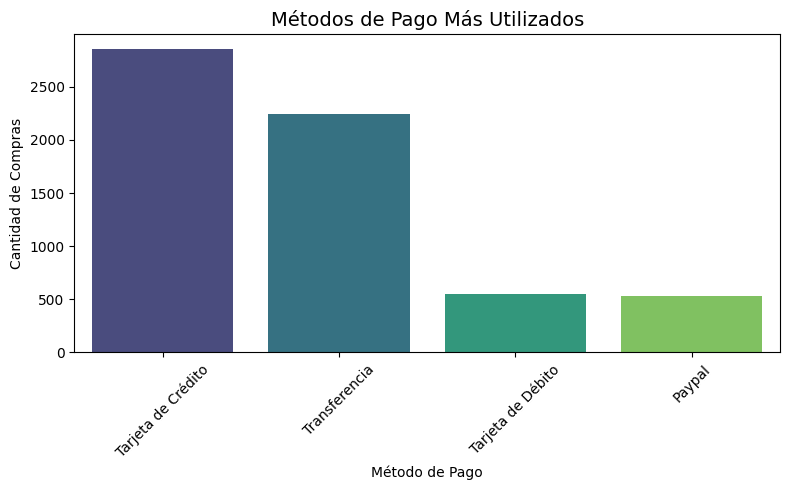

In [31]:

# Paso 2: Crear visualizaci√≥n
plt.figure(figsize=(8, 5))
sns.barplot(data=metodos_de_pago, x='metodo_pago', y='cantidad', palette='viridis')

# Est√©tica del gr√°fico
plt.title('M√©todos de Pago M√°s Utilizados', fontsize=14)
plt.xlabel('M√©todo de Pago')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Paso 1: Calcular la facturaci√≥n por fila
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

In [34]:
# Paso 2: Agrupar por categor√≠a y sumar facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().sort_values(ascending=True).reset_index()

In [41]:
# Paso 3: Ordenar los datos por facturaci√≥n de mayor a menor
facturacion_categoria= facturacion_categoria.sort_values(by='facturacion', ascending=False)

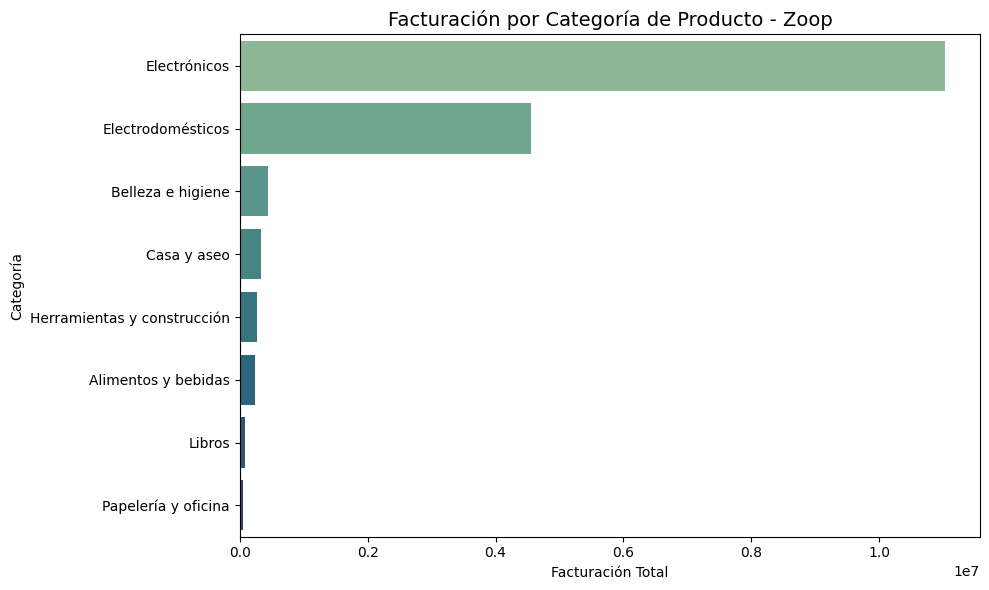

In [43]:
# Paso 3: Visualizaci√≥n de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=facturacion_categoria, y='categoria', x='facturacion', palette='crest')
# Est√©tica del gr√°fico
plt.title('Facturaci√≥n por Categor√≠a de Producto - Zoop', fontsize=14)
plt.xlabel('Facturaci√≥n Total')
plt.ylabel('Categor√≠a')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [44]:
# Paso 1: Asegurar formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [45]:
# Paso 2: Crear columna de a√±o-mes para agrupar (inicio de mes)
df['mes_anio'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

In [46]:
# Paso 3: Agrupar por mes y sumar facturaci√≥n
ventas_mensuales = df.groupby('mes_anio')['facturacion'].sum().reset_index()

In [47]:
# Paso 4: Crear columna "mes" con nombre traducido
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Extraer nombre del mes en ingl√©s y traducir
ventas_mensuales['mes'] = ventas_mensuales['mes_anio'].dt.strftime('%B').map(meses)

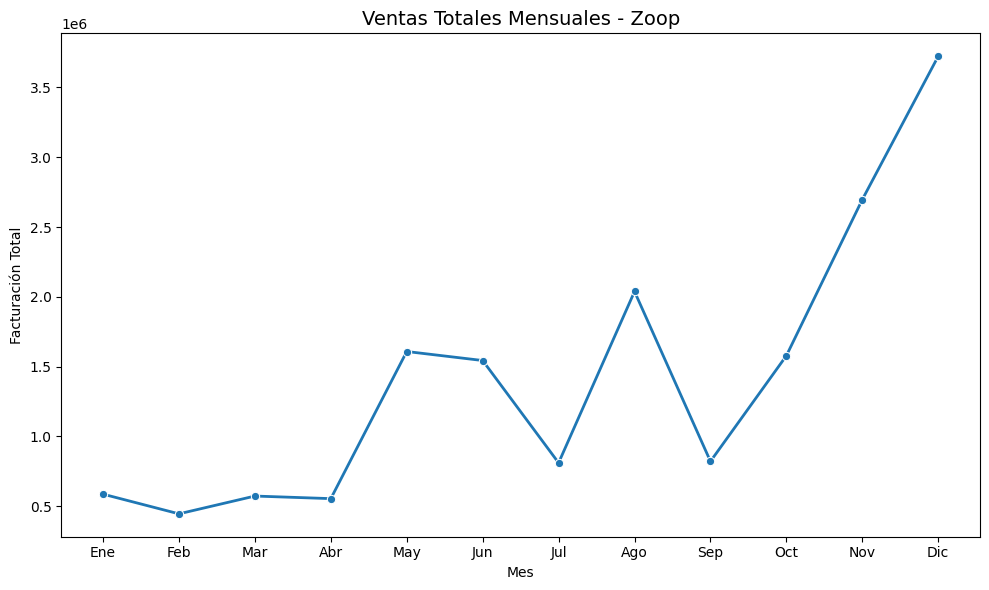

In [50]:
# Paso 5: Crear visualizaci√≥n
plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o', linewidth=2)

# Est√©tica del gr√°fico
plt.title('Ventas Totales Mensuales - Zoop', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Facturaci√≥n Total')
plt.grid(False)
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [51]:
# Paso 1: Asegurar formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [52]:
# Paso 2: Crear columna de trimestre con a√±o
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)  # Ej: '2023Q1'

In [55]:
# Paso 3: Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)
ventas_trimestrales

metodo_pago     Paypal  Tarjeta de Cr√©dito  Tarjeta de D√©bito  Transferencia
trimestre                                                                   
2023Q1       159392.78           567801.62          160984.48      716355.57
2023Q2       408176.22          1675152.84          271050.18     1351769.42
2023Q3       323562.78          1899375.64          166394.70     1280637.06
2023Q4       775944.52          3627098.81          683999.86     2911311.03

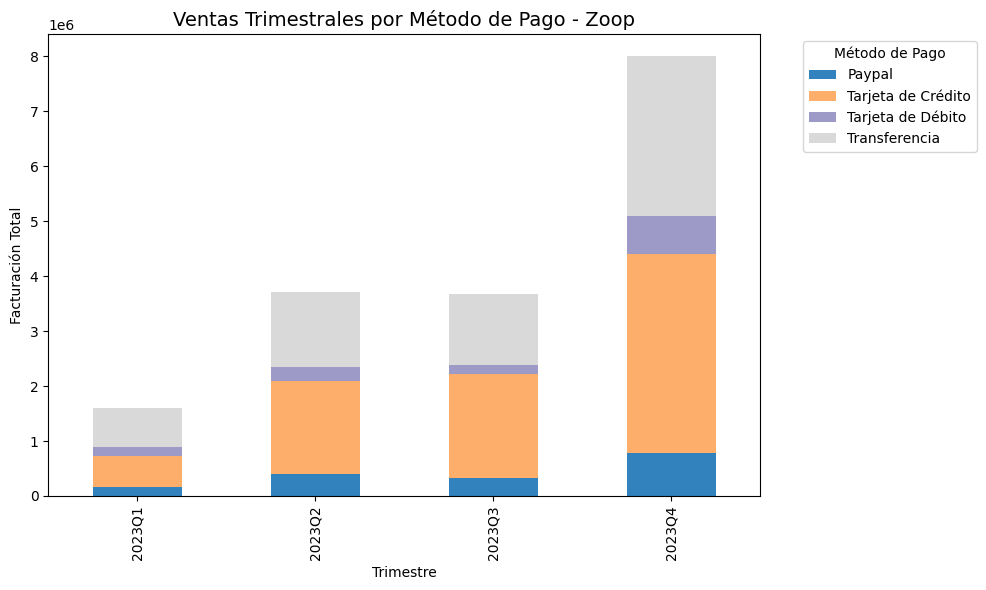

In [54]:
# Paso 4: Crear gr√°fico de barras apiladas
ventas_trimestrales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20c')

# Est√©tica del gr√°fico
plt.title('Ventas Trimestrales por M√©todo de Pago - Zoop', fontsize=14)
plt.xlabel('Trimestre')
plt.ylabel('Facturaci√≥n Total')
plt.legend(title='M√©todo de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [56]:
# Contar participaci√≥n en cashback
participacion = df['cashback'].value_counts()

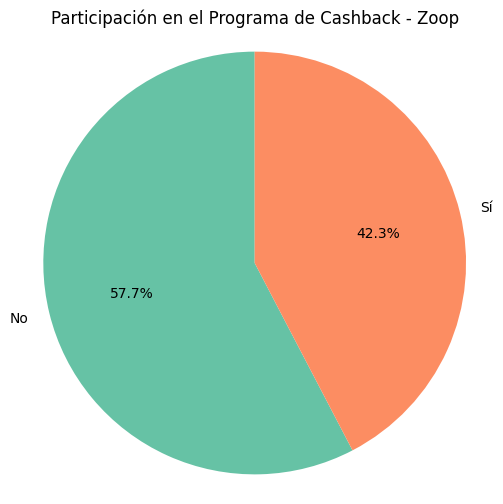

In [57]:


# Crear gr√°fico de torta
plt.figure(figsize=(6, 6))
plt.pie(participacion, labels=participacion.index, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], startangle=90)
plt.title('Participaci√≥n en el Programa de Cashback - Zoop')
plt.axis('equal')  # Para que sea un c√≠rculo perfecto
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [58]:
# Paso 1: Contar participaci√≥n
participacion = df['cashback'].value_counts()

In [59]:
# Paso 2: Colores personalizados (azul y rojo)
colores = ['#1f77b4', '#d62728']  # Azul y Rojo

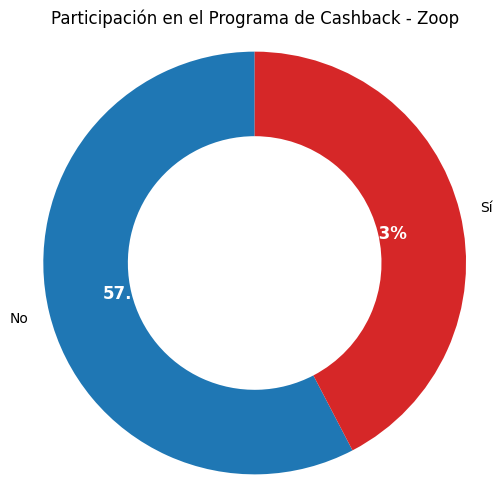

In [60]:
# Paso 3: Crear gr√°fico tipo rosquilla
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    participacion,
    labels=participacion.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colores,
    wedgeprops={'width': 0.4}  # Hace el "hueco" central
)

# Est√©tica
plt.setp(autotexts, size=12, weight='bold', color='white')
plt.title('Participaci√≥n en el Programa de Cashback - Zoop')
plt.axis('equal')  # Asegura forma circular
plt.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


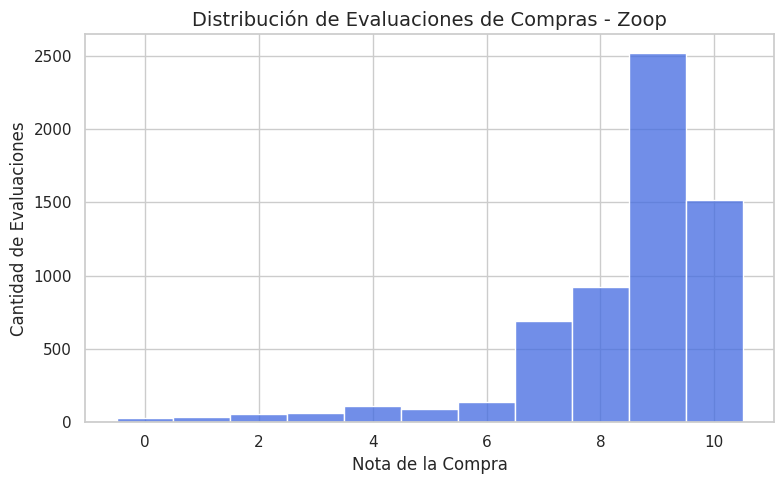

In [64]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='nota', bins=11, discrete=True, color='royalblue')
plt.title('Distribuci√≥n de Evaluaciones de Compras - Zoop', fontsize=14)
plt.xlabel('Nota de la Compra')
plt.ylabel('Cantidad de Evaluaciones', fontsize=12)
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez m√°s, no necesitamos especificar directamente el tipo de gr√°fico, ya que al mencionar la distribuci√≥n de valores num√©ricos de una simple columna, ChatGPT logr√≥ interpretar y proporcionar el c√≥digo para un histograma de columnas. Este gr√°fico es ideal para presentar la distribuci√≥n de una muestra de datos o poblaci√≥n. Cada columna aqu√≠ representa la frecuencia de repetici√≥n de un valor.

¬øTe gustar√≠a experimentar haciendo lo mismo solo con las edades?


### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


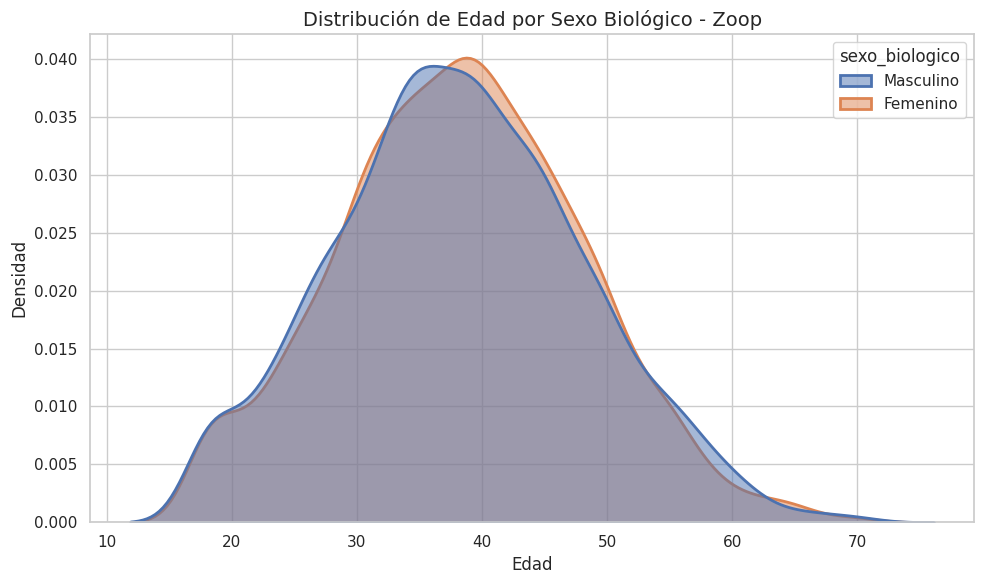

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style='whitegrid')

# Crear gr√°fico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='edad', hue='sexo_biologico', fill=True, common_norm=False, alpha=0.5, linewidth=2)

# Est√©tica
plt.title('Distribuci√≥n de Edad por Sexo Biol√≥gico - Zoop', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.tight_layout()
plt.show()


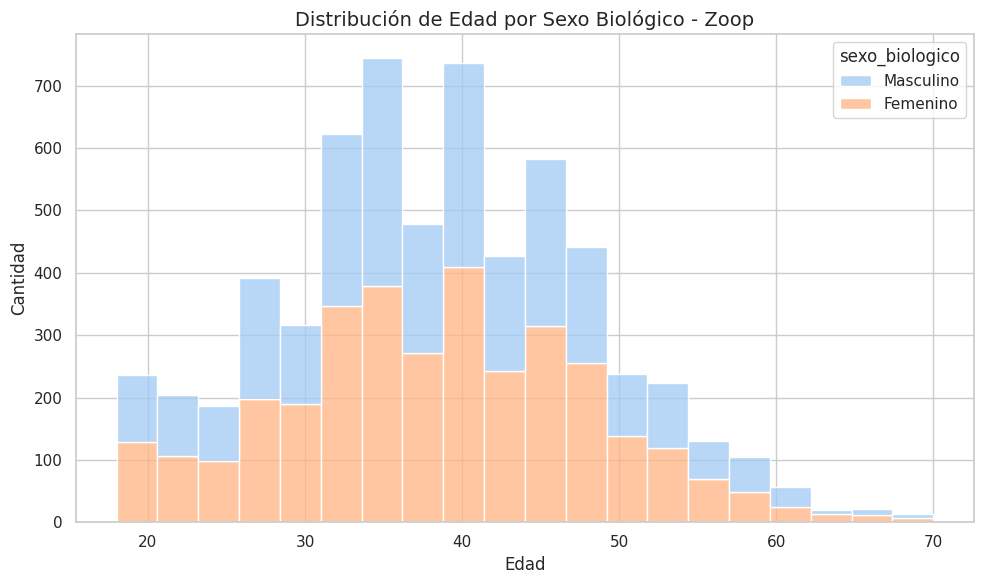

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad', hue='sexo_biologico', multiple='stack', bins=20, palette='pastel')

# Est√©tica
plt.title('Distribuci√≥n de Edad por Sexo Biol√≥gico - Zoop', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en el gr√°fico de viol√≠n. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


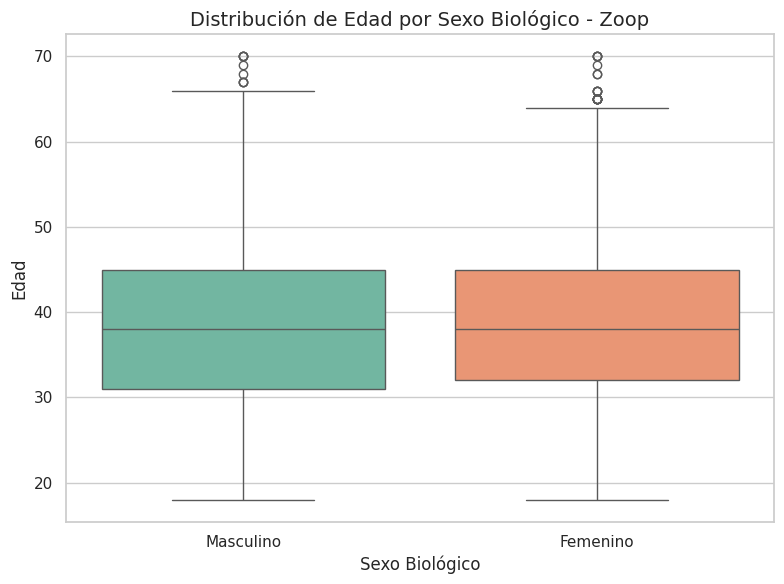

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style='whitegrid')

# Crear boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sexo_biologico', y='edad', palette='Set2')

# Est√©tica
plt.title('Distribuci√≥n de Edad por Sexo Biol√≥gico - Zoop', fontsize=14)
plt.xlabel('Sexo Biol√≥gico')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()



<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [37]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos a√±adido 4 c√≠rculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python

# 1. Calcular la facturaci√≥n para cada compra
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']

# 2. Agrupar por categor√≠a y sumar la facturaci√≥n
facturacion_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

# 3. Ordenar los datos por facturaci√≥n de mayor a menor
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=False)

# 4. Crear el gr√°fico de barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette='viridis',orient='h')

# 5. A√±adir etiquetas y t√≠tulo
plt.title('Facturaci√≥n por Categor√≠a de Producto', fontsize=16)
plt.xlabel('Facturaci√≥n (en MXN$)', fontsize=12)
plt.ylabel('Categor√≠a', fontsize=12)

# 6. Mostrar el gr√°fico
plt.show()
```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python

# 1. Crear una nueva columna 'trimestre' que extrae el trimestre de la columna 'fecha'
df['trimestre'] = df['fecha'].dt.to_period('Q')

# 2. Agrupar los datos por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestre = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3. Crear el gr√°fico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# 4. A√±adir etiquetas y t√≠tulo
plt.title('Ventas por Trimestre y M√©todo de Pago', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Facturaci√≥n Total', fontsize=12)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mayor claridad

# 5. Mostrar el gr√°fico
plt.legend(title='M√©todo de Pago por trimestre de 2023')
plt.tight_layout()
plt.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
plt.figure(figsize=(6, 6))
plt.pie(cashback_proporcion, labels=cashback_proporcion.index, autopct='%1.1f%%',
        colors=['#FF6666', '#66b3ff'], startangle=90, explode=(0.05, 0), wedgeprops={'width': 0.4})

# 3. A√±adir t√≠tulo
plt.title('Proporci√≥n de Usuarios Participando en el Programa de Cashback', fontsize=16)

# 4. Mostrar el gr√°fico
plt.axis('equal')  # Asegura que el gr√°fico sea un c√≠rculo
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de distribuci√≥n (histograma)
sns.histplot(df['nota'], bins=11, kde=False, color='skyblue')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de las Calificaciones de las Compras', fontsize=16)
plt.xlabel('Calificaci√≥n (0-10)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a a√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 1. Configurar el tama√±o del gr√°fico
plt.figure(figsize=(10, 6))

# 2. Crear el gr√°fico de boxplot
sns.boxplot(x='sexo_biologico', y='edad', data=df, palette='Set2')

# 3. A√±adir etiquetas y t√≠tulo
plt.title('Distribuci√≥n de la Audiencia por Edad y Sexo Biol√≥gico', fontsize=16)
plt.xlabel('Sexo Biol√≥gico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# 4. Mostrar el gr√°fico
plt.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_mensuales()
*   facturacion_por_categoria()
*   ventas_por_trimestre()
*   proporcion_cashback()
*   distribucion_calificaciones()
*   box_plot_edad_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!